In [1]:
#Phase 1
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("customer_analytics.csv")

# Display first 5 rows
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [2]:
# Phase 2: Data Cleaning

# Check missing values
df.isnull().sum()

# Drop columns with too many missing values (example: Education has some missing but manageable)
# If a column has >30% missing, consider dropping
# Here, we'll impute missing AnnualIncome with median
df["AnnualIncome"].fillna(df["AnnualIncome"].median(), inplace=True)

# Fill missing Education with "Unknown"
df["Education"].fillna("Unknown", inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify cleaning
df.isnull().sum()

C:\Users\Anvitha L\AppData\Local\Temp\ipykernel_24644\3636346776.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AnnualIncome"].fillna(df["AnnualIncome"].median(), inplace=True)
C:\Users\Anvitha L\AppData\Local\Temp\ipykernel_24644\3636346776.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

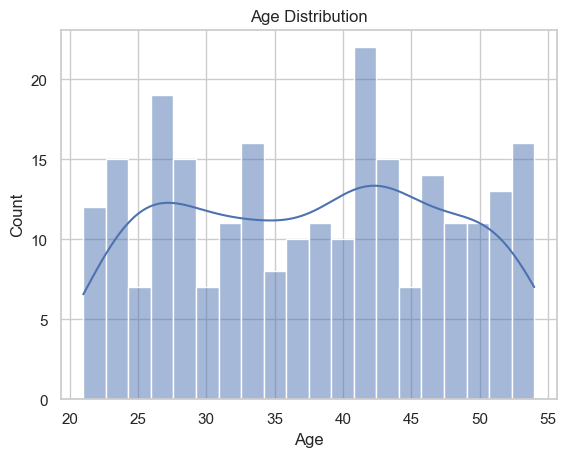

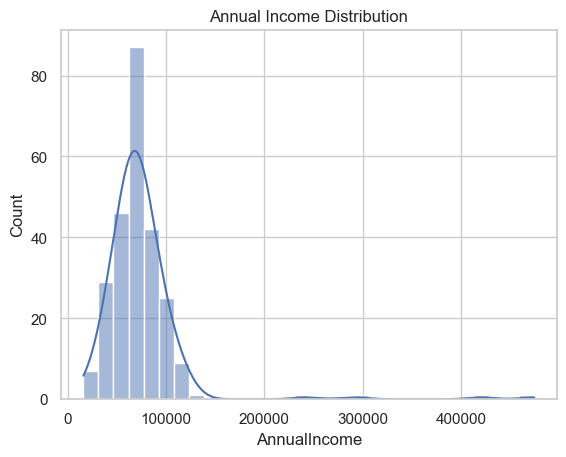

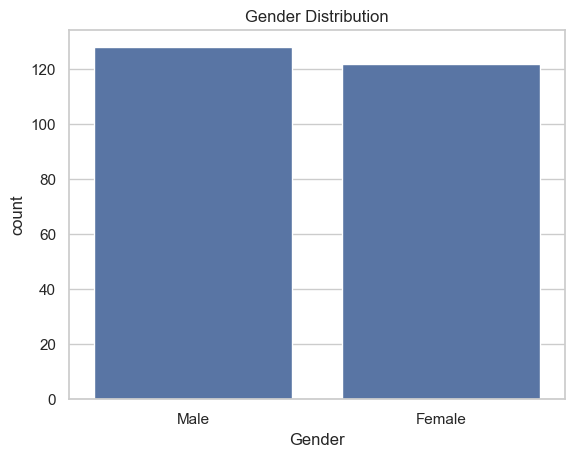

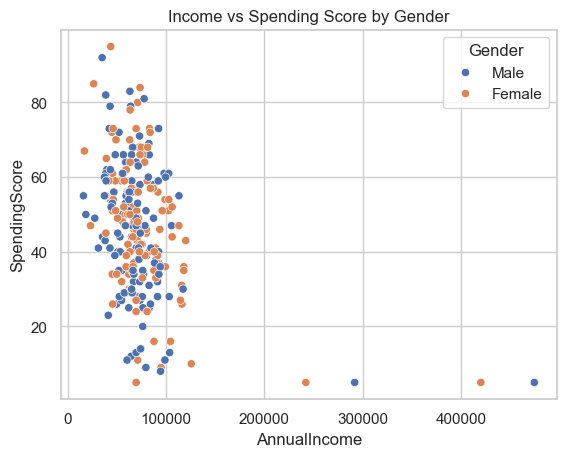

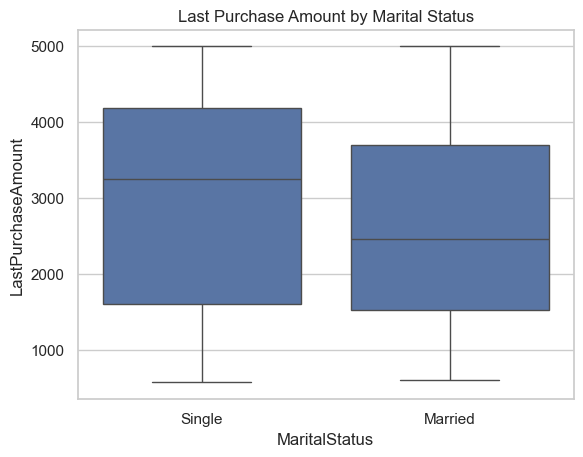

In [3]:
# Phase 3: Univariate & Bivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate plots
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df["AnnualIncome"], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Bivariate plots
sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue="Gender", data=df)
plt.title("Income vs Spending Score by Gender")
plt.show()

sns.boxplot(x="MaritalStatus", y="LastPurchaseAmount", data=df)
plt.title("Last Purchase Amount by Marital Status")
plt.show()

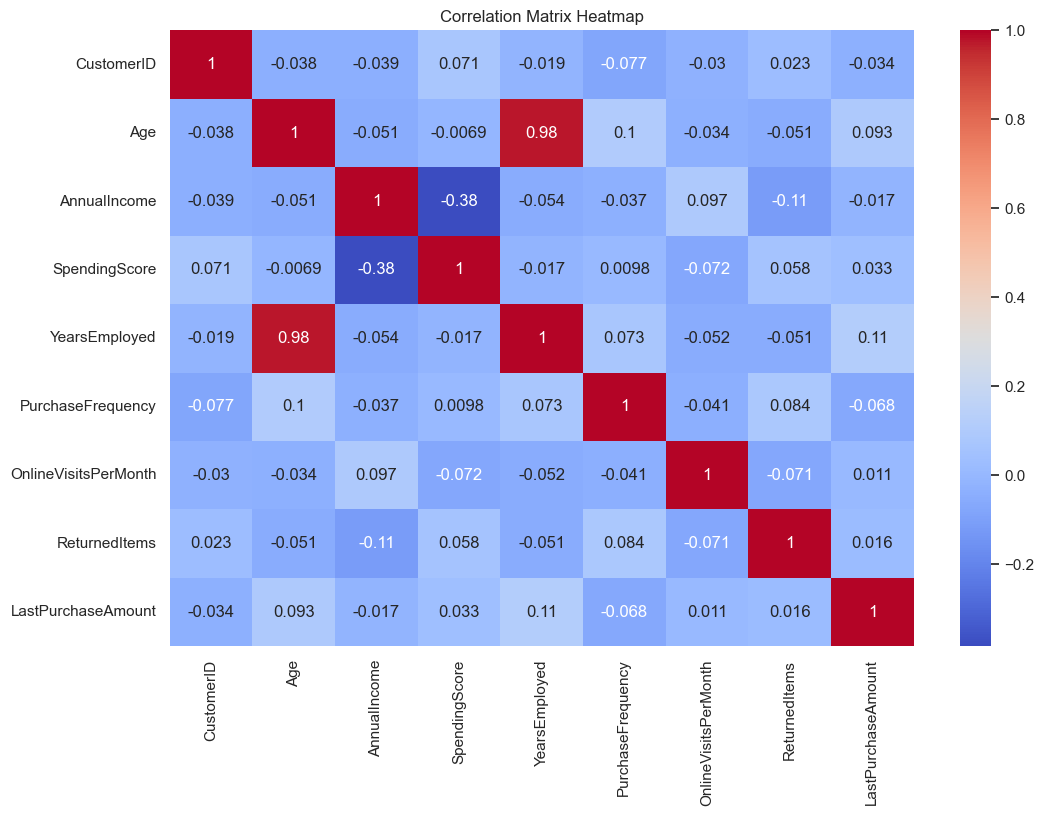

In [4]:
# Phase 4: Multivariate Analysis

# Correlation matrix
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()